<a href="https://colab.research.google.com/github/Zack20100/LimpiezaDatos/blob/main/Prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install skforecast

In [ ]:
!pip install --upgrade statsmodels

In [ ]:
!pip install arch

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from datetime import datetime
from arch.unitroot import PhillipsPerron as pprtest
from arch.unitroot import DFGLS

# Librerías para dibujado de gráficos

In [111]:
import warnings
warnings.filterwarnings('ignore')

# Descarga de datos

In [112]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Series temporales/Datos/vic_elec.csv", sep=',', index_col=0)
data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52608 entries, 0 to 52607
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         52608 non-null  object 
 1   Demand       52608 non-null  float64
 2   Temperature  52608 non-null  float64
 3   Date         52608 non-null  object 
 4   Holiday      52608 non-null  bool   
dtypes: bool(1), float64(2), object(2)
memory usage: 2.1+ MB


In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
data.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Time,52608,52608,2011-12-31T13:00:00Z,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Demand,52608.0,NaN,NaN,NaN,4665.432826,874.273645,2857.945728,3969.464472,4634.706032,5244.325424,9345.004346
Temperature,52608.0,NaN,NaN,NaN,16.265071,5.658849,1.5,12.3,15.4,19.4,43.2
Date,52608,1096,2013-04-07,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Holiday,52608,2,False,51120,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Columna Time a formato DateTime y a índice
 La columna Time no está con formato DateTime. Hay que transformarla.

In [115]:
data['Time'] = pd.to_datetime(data['Time'])

In [116]:
data.set_index('Time', inplace=True)

In [117]:
print(data.head())

                                Demand  Temperature        Date  Holiday
Time                                                                    
2011-12-31 13:00:00+00:00  4382.825174        21.40  2012-01-01     True
2011-12-31 13:30:00+00:00  4263.365526        21.05  2012-01-01     True
2011-12-31 14:00:00+00:00  4048.966046        20.70  2012-01-01     True
2011-12-31 14:30:00+00:00  3877.563330        20.55  2012-01-01     True
2011-12-31 15:00:00+00:00  4036.229746        20.40  2012-01-01     True


# Visualización del gráfico de series temporales

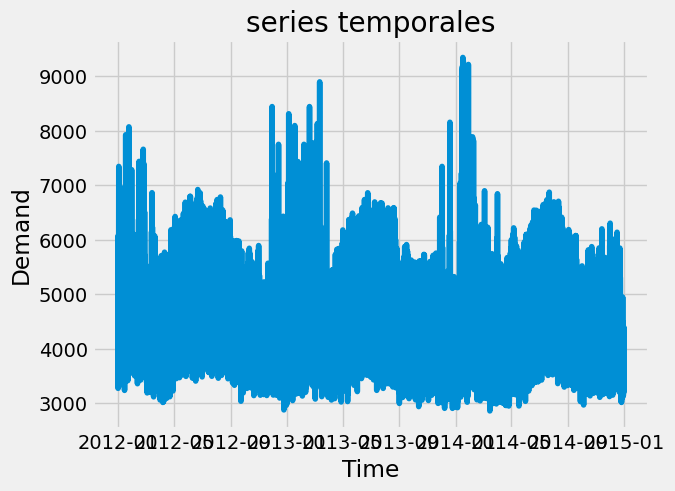

In [118]:
plt.plot(data.index, data['Demand'])
plt.xlabel('Time')
plt.ylabel('Demand')
plt.title('series temporales')
plt.show()

# Application des tests statistiques

In [131]:
# Test de Dickey-Fuller augmenté (ADF)
result = adfuller(data['Demand'])
print('Estadística de prueba ADF:', result[0])
print('Valeur p:', result[1])
print('Valeurs critiques:', result[4])
if result[1] > 0.05:
    print('La serie temporal no es estacionaria')
else:
    print('La serie temporal es estacionaria')

Estadística de prueba ADF: -16.590466053463988
Valeur p: 1.8008398208632724e-29
Valeurs critiques: {'1%': -3.430474445660473, '5%': -2.8615950024849743, '10%': -2.566799275993413}
La serie temporal es estacionaria


In [130]:
# Test de KPSS
result = kpss(data['Demand'])
print('Estadística de prueba KPSS:', result[0])
print('Valeur p:', result[1])
print('Valeurs critiques:', result[3])
if result[1] > 0.05:
    print('La serie temporal no es estacionaria')
else:
    print('La serie temporal es estacionaria')


Estadística de prueba KPSS: 1.6533925405471313
Valeur p: 0.01
Valeurs critiques: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
La serie temporal es estacionaria


In [129]:
# Test de Phillips Perron
result = pprtest(data["Demand"])
print('Estadística de prueba:', result.stat)
print('Valor p:', result.pvalue)
print('Valores críticos:')
for key, value in result.critical_values.items():
    print('\t{}: {}'.format(key, value))
if result.pvalue > 0.05:
    print('La serie temporal no es estacionaria')
else:
    print('La serie temporal es estacionaria')

Estadística de prueba: -20.78114589695157
Valor p: 0.0
Valores críticos:
	1%: -3.4304743108162734
	5%: -2.861594942887792
	10%: -2.5667992442715977
La serie temporal es estacionaria


In [127]:
# Prueba de Dickey-Fuller least squares generalizado
dfgls = DFGLS(data["Demand"], lags=10)
print('Estadística de prueba:', dfgls.stat)
print('Valor p:', dfgls.pvalue)
print('Valores críticos:')
for key, value in dfgls.critical_values.items():
    print('\t{}: {}'.format(key, value))
if result.pvalue > 0.05:
    print('La serie temporal no es estacionaria')
else:
    print('La serie temporal es estacionaria')

Estadística de prueba: -43.75076809617645
Valor p: 0.0
Valores críticos:
	1%: -2.5682087139940424
	5%: -1.944046245354793
	10%: -1.6204247858938594
La serie temporal es estacionaria
